In [74]:
import pandas as pd
import seaborn as sns

In [75]:
df=pd.read_excel("weight-height (1).xlsx")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

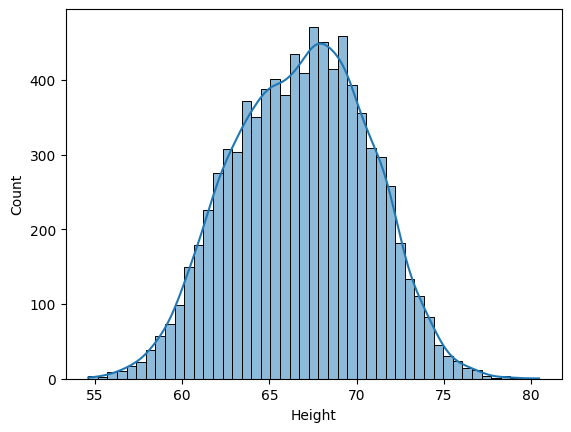

In [76]:
sns.histplot(df["Height"],kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

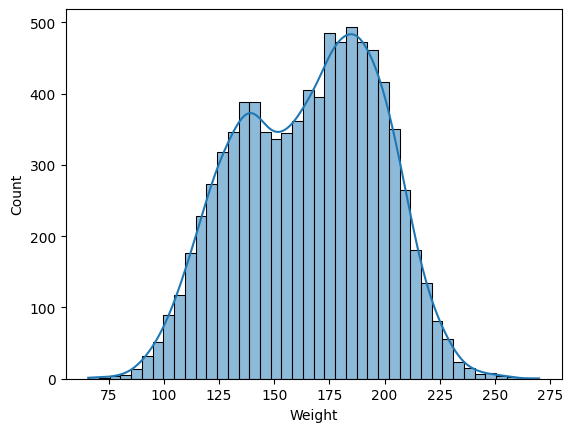

In [77]:
sns.histplot(df["Weight"],kde=True)

<Axes: ylabel='Height'>

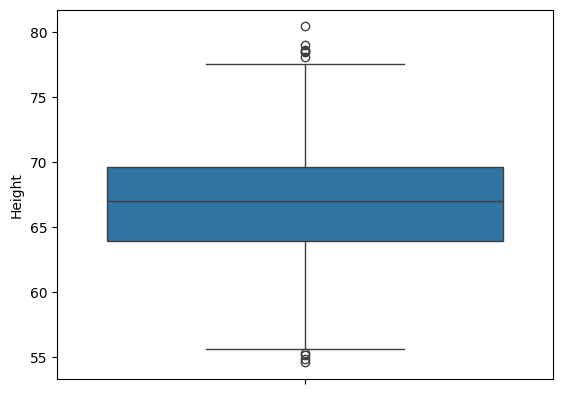

In [78]:
sns.boxplot(df["Height"])

In [79]:
mean_val=df["Height"].mean()

In [80]:
std_val=df["Height"].std()

In [81]:
df["z_score"] = (df["Height"] - mean_val) / std_val



In [82]:
df.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


In [83]:
df[df["z_score"]>3]

,Gender,Height,Weight,z_score
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539


In [84]:
df[df["z_score"]<-3]

,Gender,Height,Weight,z_score
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783


In [85]:
df1=df[(df["z_score"]<=3) & (df["z_score"]>=-3)]

In [86]:
df.shape

(8555, 4)

In [87]:
df1.shape

(8547, 4)

<Axes: ylabel='Height'>

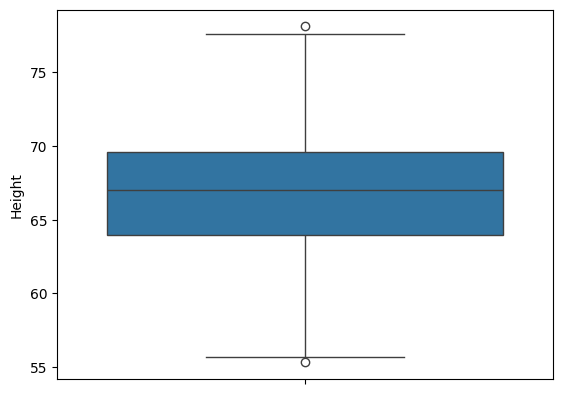

In [88]:
sns.boxplot(df1["Height"])

In [89]:
mean_val=df["Weight"].mean()

In [90]:
std_val=df["Weight"].std()

In [91]:
df["z1_score"] = (df["Weight"] - mean_val) / std_val


In [92]:
df.head()

,Gender,Height,Weight,z_score,z1_score
0,Male,73.847017,241.893563,1.827126,2.379884
1,Male,68.781904,162.310473,0.512009,-0.103678
2,Male,74.110105,212.740856,1.895435,1.470111
3,Male,71.730978,220.042470,1.277713,1.697974
4,Male,69.881796,206.349801,0.797587,1.270664


In [93]:
df[df["z1_score"]>3]

,Gender,Height,Weight,z_score,z1_score
2014,Male,78.998742,269.989698,3.164731,3.256685


In [94]:
df[df["z1_score"]<-3]

,Gender,Height,Weight,z_score,z1_score
151,Male,65.350411,65.78000,-0.378952,-3.116121
160,Male,64.333648,68.64000,-0.642946,-3.026868
5360,Female,55.668202,68.98253,-2.892861,-3.016179


In [95]:
df2=df[(df["z1_score"]<=3) & (df["z1_score"]>=-3)]

In [96]:
df.shape

(8555, 5)

In [97]:
df2.shape

(8551, 5)

<Axes: >

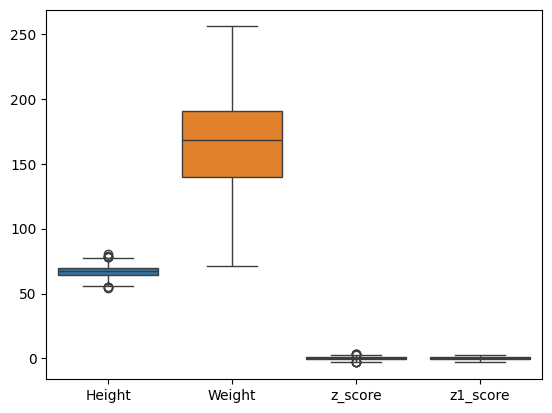

In [98]:
sns.boxplot(df2)

In [99]:
#check std
mn=df["Height"].mean()
std_val=df["Height"].std()

In [100]:
pos=mn+3*std_val
neg=mn-3*std_val

In [101]:
df[df["Height"]>pos]

,Gender,Height,Weight,z_score,z1_score
1317,Male,78.462053,227.342565,3.025384,1.925789
2014,Male,78.998742,269.989698,3.164731,3.256685
3285,Male,78.528210,253.889004,3.042561,2.754228
3757,Male,78.621374,245.733783,3.066750,2.499727
6328,Female,80.450000,178.020675,3.541539,0.386592


In [102]:
df[df["Height"]<neg]

,Gender,Height,Weight,z_score,z1_score
6624,Female,54.616858,71.393749,-3.165834,-2.940932
7294,Female,54.873728,78.606670,-3.099140,-2.715837
7617,Female,55.148557,88.812412,-3.027783,-2.397345


In [103]:
df3=df[(df["Height"]<=pos) & (df["Weight"]>=neg)]

<Axes: ylabel='Height'>

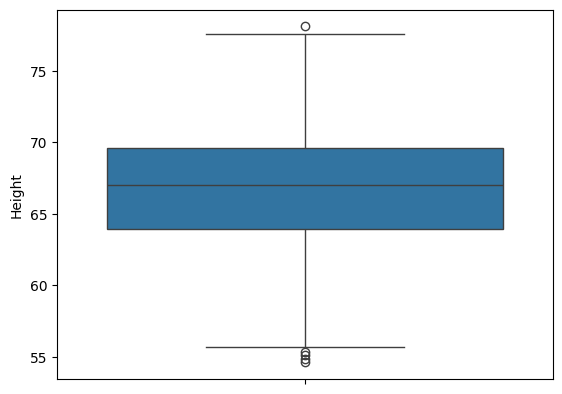

In [104]:
sns.boxplot(df3["Height"])

In [105]:
mn1=df["Weight"].mean()
std_val1=df["Weight"].std()

In [106]:
pos1=mn1+3*std_val1
neg1=mn1-3*std_val1

In [107]:
df[df["Weight"]>pos1]

,Gender,Height,Weight,z_score,z1_score
2014,Male,78.998742,269.989698,3.164731,3.256685


In [108]:
df[df["Weight"]<neg1]

,Gender,Height,Weight,z_score,z1_score
151,Male,65.350411,65.78000,-0.378952,-3.116121
160,Male,64.333648,68.64000,-0.642946,-3.026868
5360,Female,55.668202,68.98253,-2.892861,-3.016179


In [109]:
df4=df[(df["Weight"]<=pos1) & (df["Weight"]>=neg1)]

<Axes: ylabel='Weight'>

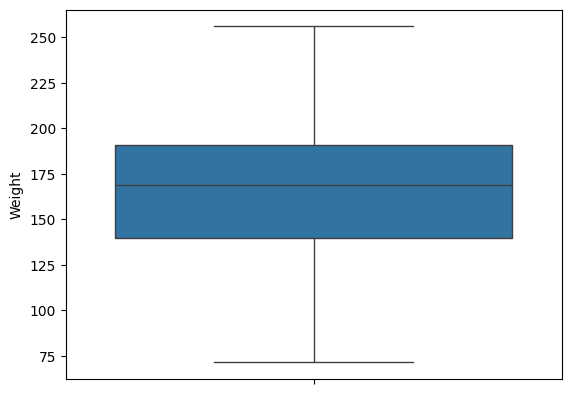

In [110]:
sns.boxplot(df4["Weight"])

In [111]:
#apply boxplot
q1=df["Height"].quantile(.25)
q2=df["Height"].quantile(.75)

In [112]:
iqr=q2-q1
iqr

np.float64(5.646743199999989)

In [113]:
val=q1-1.5*iqr
val

np.float64(55.48756911000002)

In [114]:
val1=q2+1.5*iqr
val1

np.float64(78.07454190999997)

In [115]:
def out_lier(df,col):
  q1=df["Height"].quantile(.25)
  q2=df["Height"].quantile(.75)
  upper_wisk=q2+1.5*iqr
  lower_wisk=q1-1.5*iqr

  return df[(df[col]<=upper_wisk) & (df[col]>=lower_wisk)]


In [116]:
df4=out_lier(df,"Height")

In [117]:
df4.shape

(8545, 5)

<Axes: ylabel='Height'>

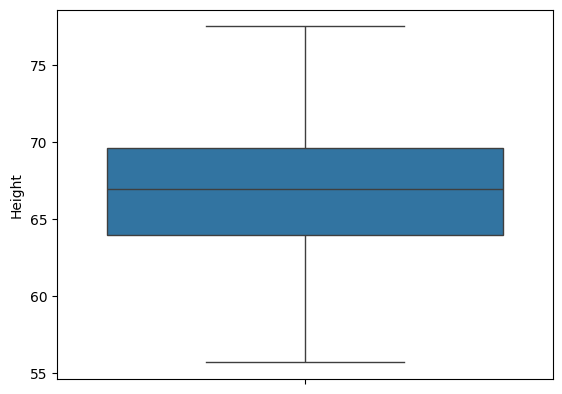

In [118]:
sns.boxplot(df4["Height"])

<Axes: >

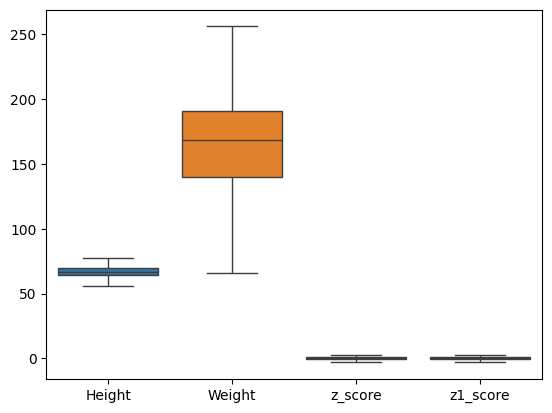

In [119]:
sns.boxplot(df4)